In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [11]:
data = pd.read_csv('time series data.csv', parse_dates=['Date'], dayfirst=True) 
data.set_index('Date', inplace=True)
data

,value
Date,
2024-01-01,10000
2024-01-02,15000
2024-01-03,15200
2024-01-04,19000
2024-01-05,20000
2024-01-06,14500
2024-01-07,11400
2024-01-08,16500
2024-01-09,18000


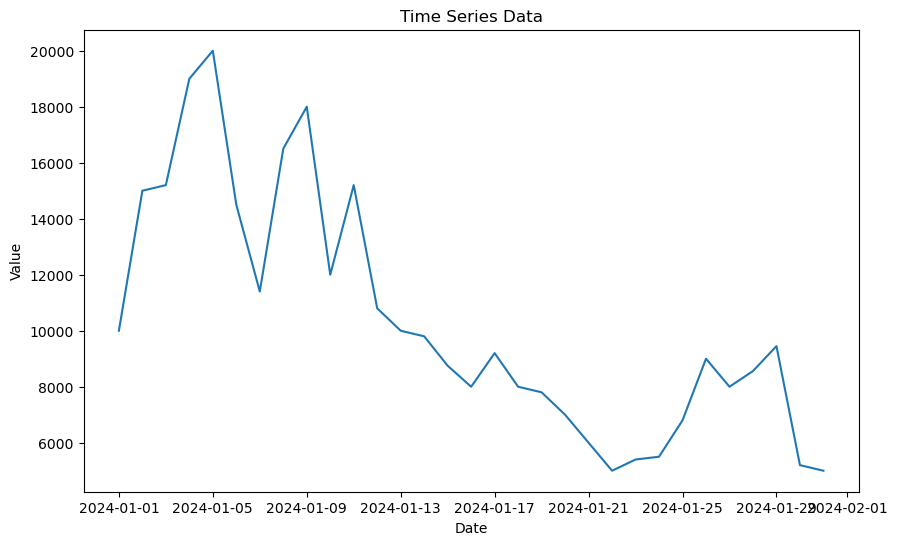

In [12]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [13]:
# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(data, model='additive', period=1)  # Set period as 1 if frequency is not explicitly defined
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

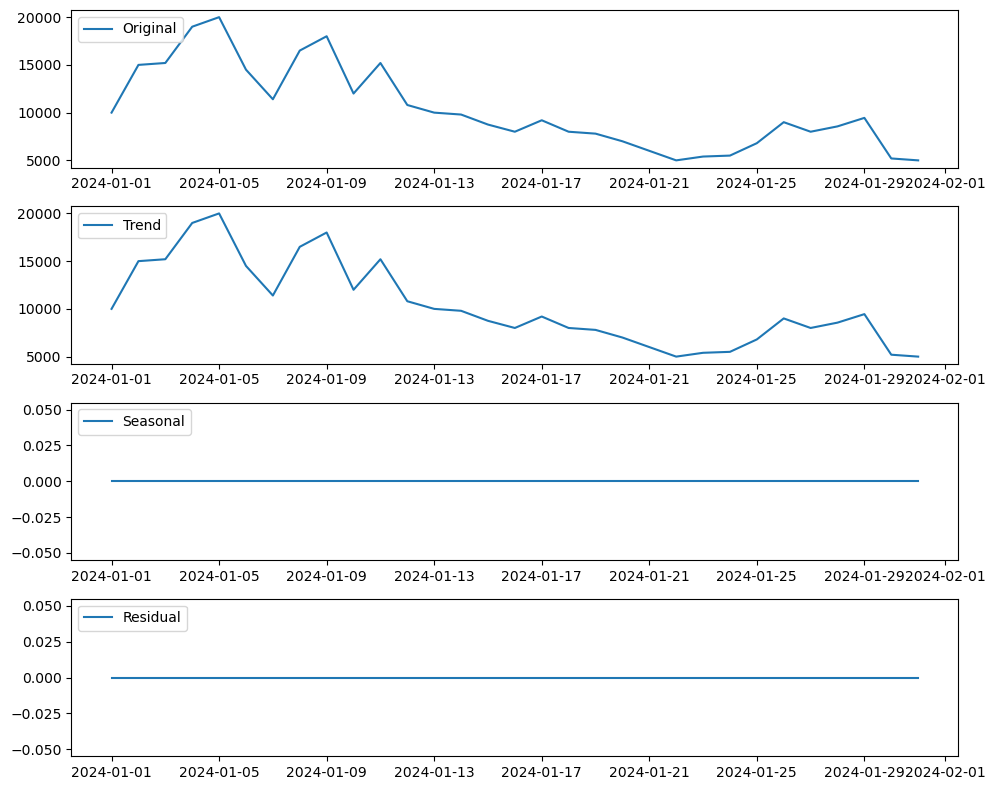

In [14]:
# Visualize the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Perform ARIMA forecasting
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


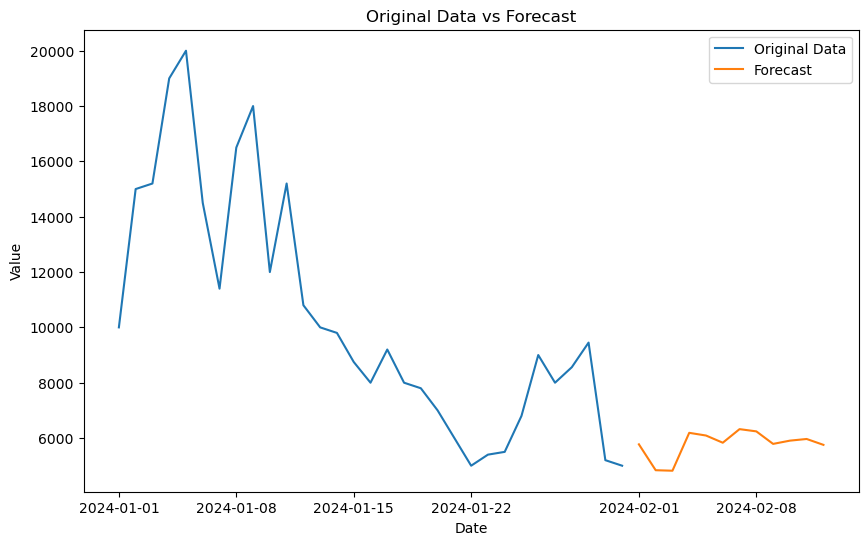

In [16]:
# Visualize the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('Original Data vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()